# Sentiment Analysis 

Sentiment analysis is the process of understanding the opinion of an author about a subject.

Three typical elements of a sentiment analysis system:

Opinion (Polarity): How positive and negative is the topic
Subject: What is the topic and disscussion
Opion holder: By whom is this feeling.


Applications: Brand monitoring, Customer service, Product analytics, Market research and analysis


Two main algorithms used for sentiment analysis:
1. <b>Automated\machine learning</b>

   1. The task is a classification problem with historical data with labeled sentiment.
   
   1. Rely on having labelled historical data

   1. Might take a while to train

   1. More powerfull than seccond model
   

2. <b>Rule\lexicon based</b>

   2. There is list of word with a valance score: nice=+2, bad= -1, Then the algorithm matches the words form lexicon to the words of text and sum or average over the whole text
 
   2. Rely on manually crafted rules or dictonaries

   2.  Faild at certain tasks because the polarity of words might change with the problem which will not be reflected in a predefined dictionaty (different polarity in different contexts)

   2. They can be quite fast

In this excersize we use the machine learning to sentiment a text.
In particular, we use a historical data with know sentiment to predic a sentiment of a new text.

# Example of Rule\lexicon based method:

We use the python textblob library. It automatically do the sentiment analysis on that. In the exmple below the polarity is meusered from -1 to 1. because of good our sentence carries a positive emotion with polarity of positive. subjectivity is from 0 (very ojective) to 1 (very subjective). So this example is subjective.

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/IMDB_sample.csv")
df.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [5]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', df.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df.label.value_counts() / len(df))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


# Word cloud
It is an image composed of words withh different sizes and colors

Pros:

Can reveal the essentials

Unless told otherwise, they plot all the words in a text and provide a image



Cons: 
Not always relevant

In good for specific conclusion

So much preprocessnig for long text.


#  String operators and comparisons
- Checks if a string is composed only of letters

my_string.isalpha()

- Checks if a string is composed only of digits

my_string.isdigit()

- Checks if a string is composed only of alphanumeric characters

my_string.isalnum()


In [1]:
with open("dataset/east_of_eden.txt", 'r') as fp:
     east_of_eden = fp.read()

In [25]:
my_stopwords = {'a', 'about', 'above', 'after', 'again', 'against', 'all',
 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being','below', 'between', 'both',
 'br', 'but','by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
 "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'else', 'ever', 'few', 'film', 'films', 'for', 'from', 'further', 'get',
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd",
 "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his',
 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if',
 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k',
 "let's", 'like', 'me', 'more', 'most', 'movie' 'movies', "mustn't", 'my',
 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other',
 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r',
 'same','shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't",
 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd",
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to',
 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'watch', 'we',
 "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's",
 'when', "when's", 'where', "where's", 'which', 'while', 'who',
 "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
 'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself',
 'yourselves'}

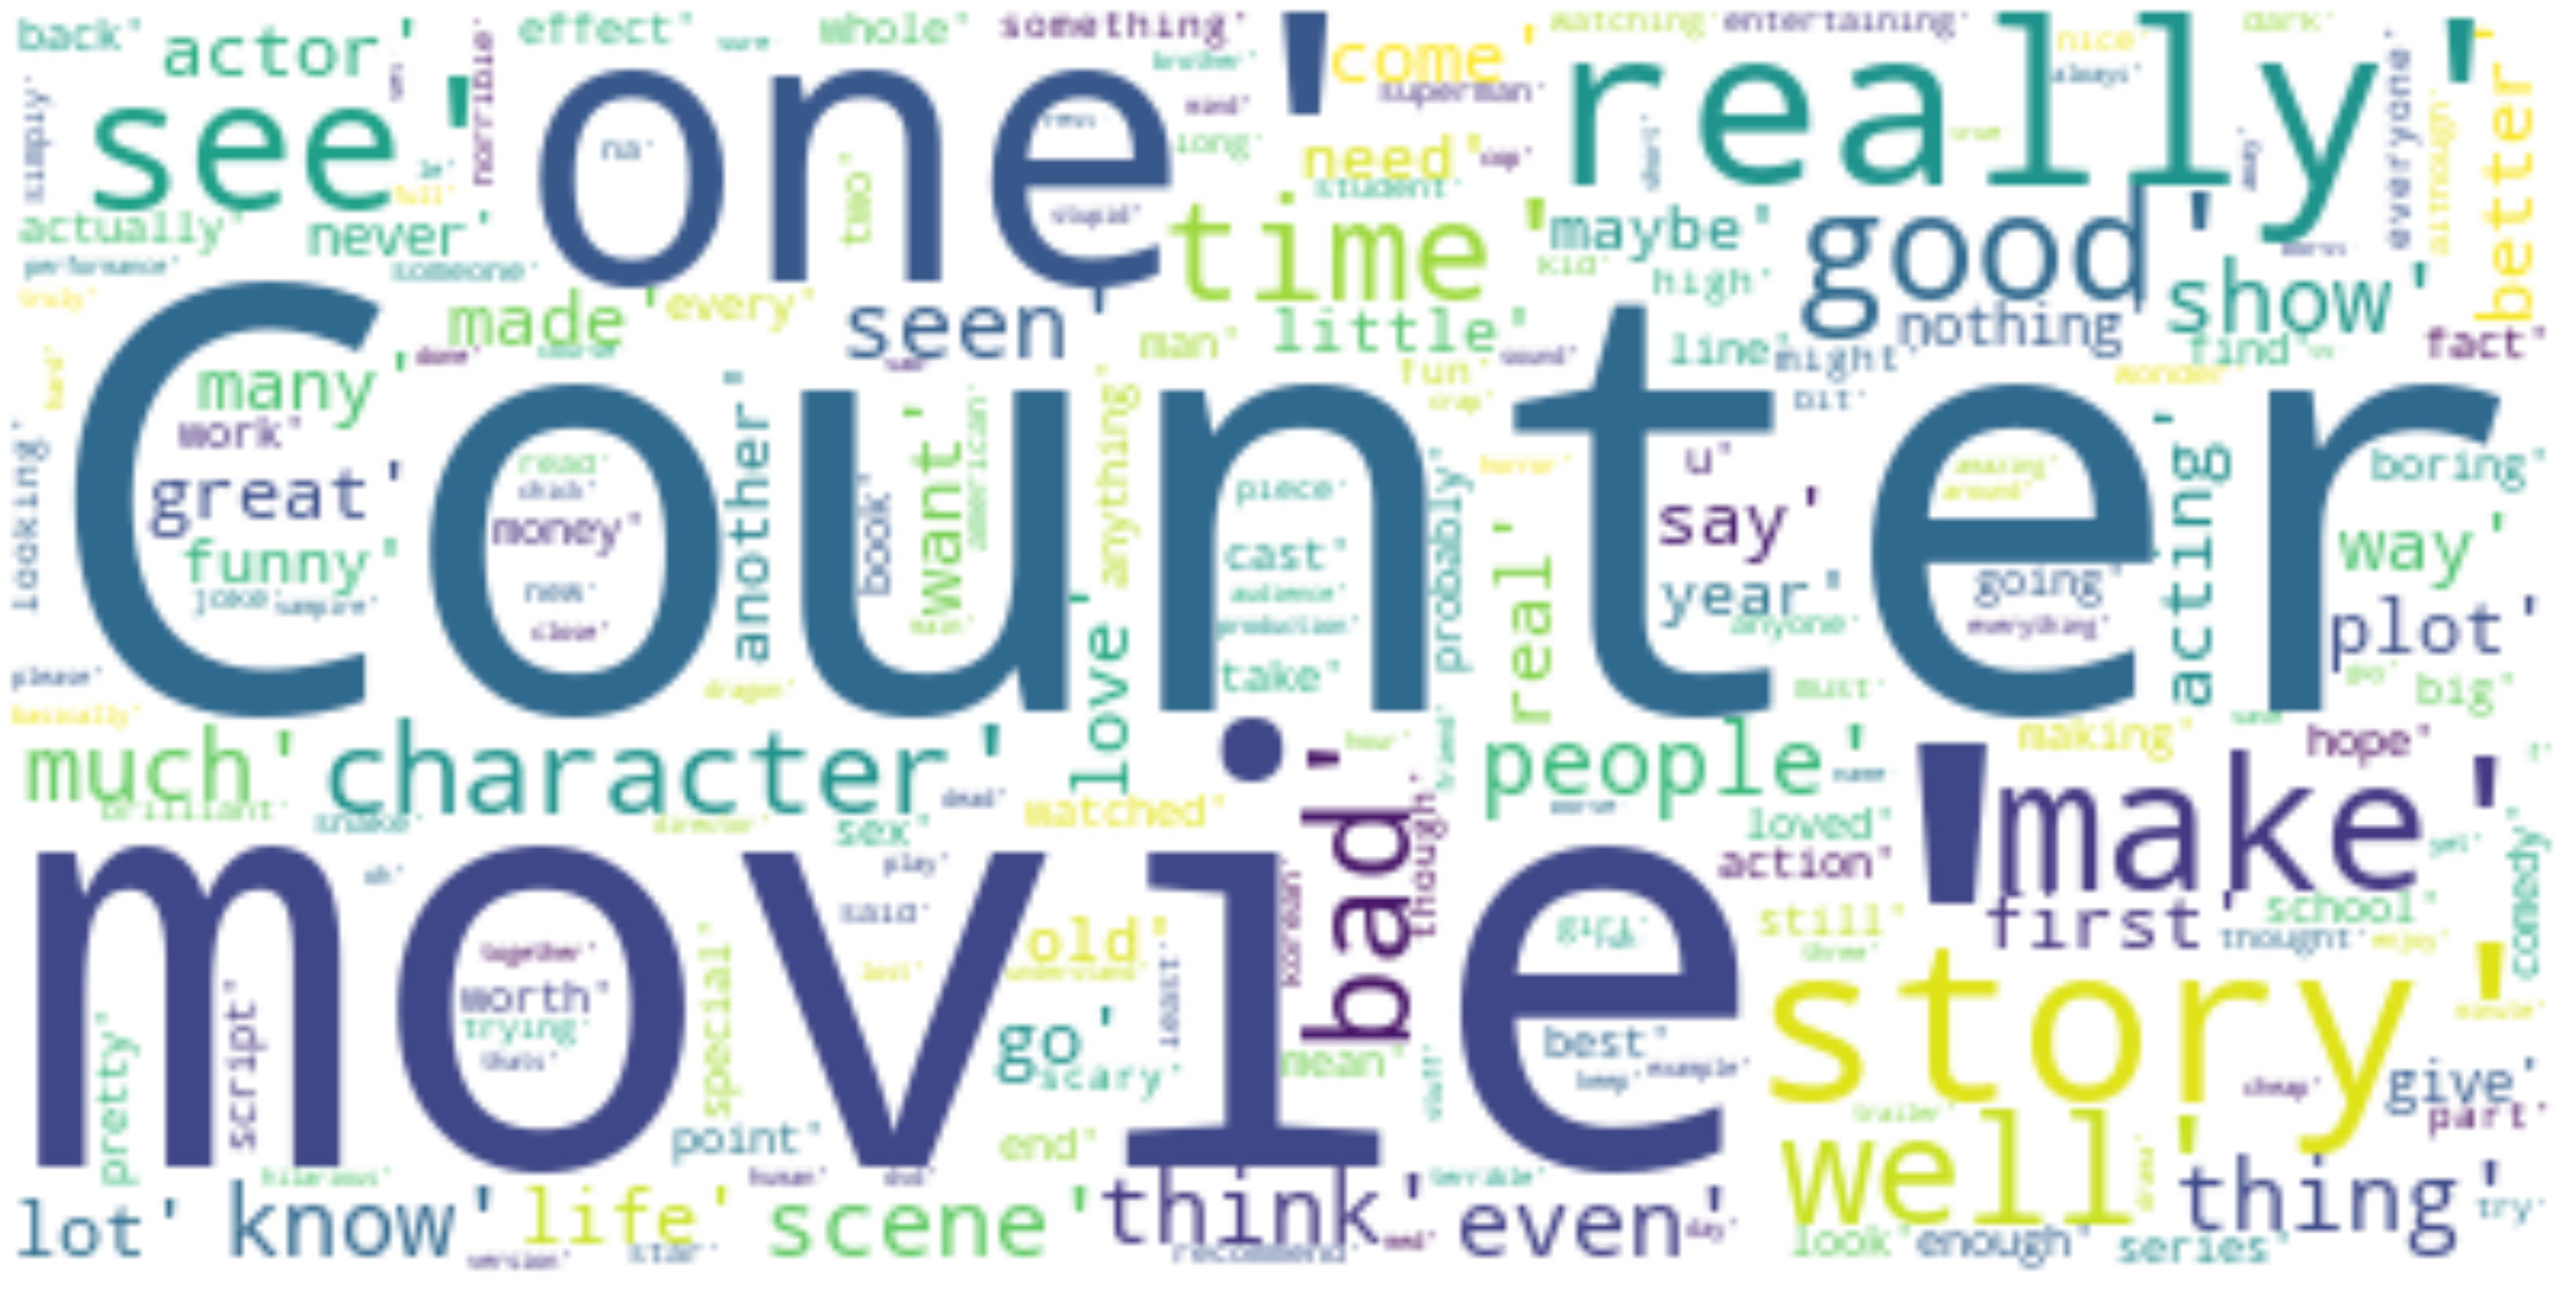

In [43]:
# Import Counter
from collections import Counter
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt

# Import the word cloud function 
from wordcloud import WordCloud 
from nltk.corpus import stopwords


# Tokenize the article: tokens
tokens = word_tokenize(east_of_eden)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]


# stopwords.append('my_stopwords')
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = stop_words.union(my_stopwords)

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in new_stopwords]


# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lemmatized)

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(str(bow_simple))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

# Second method
Use the sklearn and CountVectorizer instead to above method

# Bag-Of-Words (BOW)  by CountVectorizer
If we want to use the sklearn library we need to transford the word to a dictionary of numbers by CountVectorizer that turn the sentences to the bag of words similar to Gensim corpus and also remove English stop words as a preprocessing step.


The output of the vect.transform in CountVectorizer is a sparse matrix which is matrix which only save the non-zero values. So in the next step we have to change it to a array.


Bag of words does not keep the order of words.

##  n-grams
To include the order of words in the bag of words(BOW) we can include pairs and triples of tokens that appear next to each other. However, longer sequence of tokens leads to more features. Bigrams are the nubmer of unigerams to the power of 2 and the same for trigrams.

Longer token sequence results in more feature and also more precise machine learning But increases the risk of overfitting. The best way would be to try different lengths in methodes like grid search. 

vect = CountVectorizer(ngram_range=(min_n, max_n))


Unigrams : single tokens
ngram_range=(1, 1)

Bigrams: pairs of tokens

ngram_range=(1, 2)


Trigrams:triples oftokens

n-grams: sequence of n-tokens

CountVectorizer(max_feature, max_df, min_df)

max_features: if speci ed, it will include only the top most frequent words in the vocabulary. If max_features = None, all words will be included

max_df: ignore terms with higher than speci ed frequency
If it is set to integer, then absolute count; if a oat, then it is a proportion. Default is 1.0, which means it does not ignore any terms.

min_df: ignore terms with lower than speci ed frequency
If it is set to integer, then absolute count; if a oat, then it is a proportion
Default is 1.0, which means it does not ignore any terms.


# regular expressions
We have learned the regular expressions before. It is  interesting to know that CountVectorizer takes a regular expression as an argument.


- Default token pattern in CountVectorizer

'\b\w\w+\b'

- Specify a particular token pattern

CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')


## Tf-idf with sklearn
tands for Term frequency - inverse document frequency. Allows you to determine the most important words in each document. The idea behind tf-idf is that each corpus may have shared words beyond just stopwords. These words should be down-weighted in importance. For example the word of sky in the field of astronomy. 


Inverse document frequency: Log-ratio between the total number of documents and the number of documents that contain a specifc word

Used to calculate the weight of words that do not occur frequently

In [45]:
# Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build the vectorizer, specify max features and fit
vect1 = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect1.fit(df.review)
vect2 = TfidfVectorizer(max_features=100).fit(df.review)
vect2.fit(df.review)


# Transform the vectorizers
X1 = vect1.transform(df.review)
X2 = vect2.transform(df.review)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows, using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows, using BOW: 
    able to  about it  about this  acting and  acting is  acting was  \
0        0         0           0           0          0           0   
1        0         0           0           0          0           0   
2        0         0           0           0          0           0   
3        0         0           0           0          0           0   
4        0         0           0           0          0           0   

   actors and  after all  after the  again and  ...  you ll  you might  \
0           0          0          0          0  ...       0          0   
1           0          0          0          0  ...       0          0   
2           0          0          0          0  ...       0          0   
3           0          0          0          0  ...       0          0   
4           0          0          0          0  ...       0          0   

   you see  you think  you to  you ve  you want  you will  you would  \
0        0          0       0  

In [44]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(df.review)
vect.transform(df.review)
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  561


# Build new features from text

Goal : Enrich the existing dataset with features related to the text column (capturing the sentiment)
 
For example we can count the number of words in each review and write is as a new feature. 


Also we can extract the language of each review and add it to the new colum by 

from langdetect import detect_langs

for row in range(len(reviews)):  
     languages.append(detect_langs(df.loc[row, 'review']))


languages

[it:0.9999982541301151],

[es:0.9999954153640488],

[es:0.7142833997345875, en:0.2857160465706441],

[es:0.9999942365605781],

[es:0.999997956049055] ...


For the line 3 we have two outputs. Since the first one has the highest chance we choose 'es' from this line with this code


str(languages[0]).split(':')

['[es', '0.9999954153640488]']

str(languages[0]).split(':')[0]

'[es'

str(languages[0]).split(':')[0][1:]

'es'

[1:] means that take from character 1 to the end.

In [114]:
# Import the needed packages
from nltk import word_tokenize

# Import the language detection function and package
from langdetect import detect_langs

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in df.review]


# Create an empty list to store the length of the reviews
len_tokens = []
languages = [] 

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
df['n_words'] = len_tokens 

for i in range(len(df.loc[:, 'review'])):
     languages.append(detect_langs(df.loc[i, 'review']))

languages= [str(lang[0]).split(':')[0] for lang in languages]
dfnew =df

dfnew['languages'] = languages 

polar = [] 
subject = []
# Iterate over the word_tokens list and determine the length of each item
for i in range(len(df['review'])):
    blobstring = TextBlob(df.loc[i,'review']).sentiment
    polar.append(round(float(str(blobstring[0])),3 ))
    subject.append(round(float(str(blobstring[1])),3))
    #blob.append(blobstring)
    
dfnew['polarity'] = polar
dfnew['subjectivity'] = subject


dfnew.head()

,Unnamed: 0,review,label,n_words,languages,blob,polarity,subjectivity
0,18245,This short spoof can be found on Elite's Mille...,0,155,en,-0.097,-0.097,0.548
1,19801,A singularly unfunny musical comedy that artif...,0,646,en,0.187,0.187,0.504
2,3222,"An excellent series, masterfully acted and dir...",1,121,en,0.270,0.270,0.608
3,6010,The master of movie spectacle Cecil B. De Mill...,1,128,en,0.158,0.158,0.615
4,16355,I was gifted with this movie as it had such a ...,0,248,en,0.134,0.134,0.552


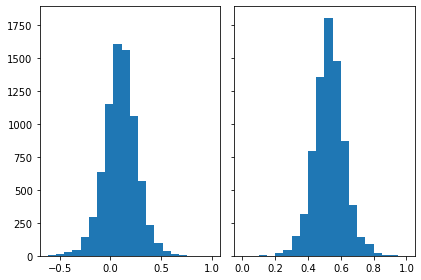

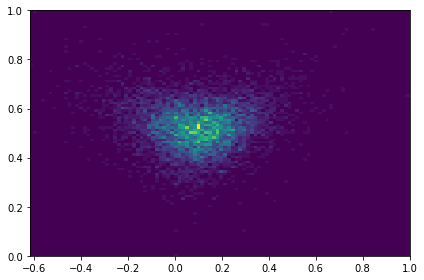

In [123]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(dfnew['polarity'], bins = 20)
axs[1].hist(dfnew['subjectivity'], bins = 20)


fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dfnew['polarity'], dfnew['subjectivity'], bins = 100)

# Logistic Regression
logistic regression is a common way to model a classification task, such as classifying the sentiment as positive or negative. The accuracy is low so we use the Naive Bayes classifier which is explained in the 'Project_NPL_scikit-learn.ipynb'  project.

# Preprocessing
As you saw before, we initially converted the text to numerics which might end up having hundreds or even thousands of features which leads to a complex model

Complex model that have the noise in the data (overfitting)
Having a large number of features or parameters make it expensive

Solution is Regularization:
A way to simplify and ensure we have a less complex model. It is included by flag of penalty = 'l2', C=1.0 is related to the power of regularization. Higher values of C correspond to less regularization.

In [57]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



# Define the vector of targets and matrix of features
y = df.label
X = X_df1

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression(penalty='l2', C=0.01).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression: ', log_reg.score(X_test, y_test))

print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1])/len(y_test))

Accuracy of logistic regression:  0.7378836833602584
[[0.37600969 0.12964459]
 [0.13247173 0.36187399]]


In [46]:
y = df.label


In [47]:
y

0       0
1       0
2       1
3       1
4       0
       ..
7496    1
7497    1
7498    0
7499    1
7500    1
Name: label, Length: 7501, dtype: int64